# Jarvis March
The Jarvis March algorithm, also known as the "gift wrapping" algorithm, is an algorithm for computing the convex hull of a set of points in a plane. The convex hull is the smallest convex polygon that encloses all of the points.

* The time complexity: O(nh). n is the number of points in the input set and h is the number of points on the convex hull. 
* The space complexity: O(n). Jarvis March stores all the points.

## What did Jarvis March do?
1. Initialization: First, identify the point with the lowest y-coordinate (the "bottom-most" point). If there is a tie, choose the leftmost point among those. This point is guaranteed to be a vertex of the convex hull and is used as the starting point.
2. Point Selection: From the current point, you need to select the next point that forms the smallest positive angle with the horizontal line passing through the current point. Essentially, you're "wrapping" the convex hull around the set of points by choosing the next point that is the most counterclockwise with respect to the current point.
3. Angle Comparison: To find this next point, iterate over all remaining points (except the current point itself) and calculate the angle between the line formed by the current point and each of these points with respect to the horizontal. The point with the smallest positive angle is selected as the next point of the hull. If there's a tie (i.e., the angle is the same), then the point furthest from the current point is chosen.
4. Check for Completion: Repeat the process of selecting the next point until you circle back to the starting point. When you select the initial point as the next hull point, the algorithm stops.
5. Convex Hull Creation: The sequence of points selected during these iterations forms the vertices of the convex hull in counterclockwise order.

## Dependencies

In [ ]:
# install dependencies
!pip install matplotlib
!pip install imageio

In [1]:
# import libraries
import math
import random
import imageio
import numpy as np
import io
import matplotlib.pyplot as plt

from IPython.display import clear_output
from matplotlib.animation import PillowWriter
import matplotlib.animation as animation

## The Algorithm

In [2]:
def dist(p1, p2):
    x1, y1, x2, y2 = *p1, *p2
    return math.sqrt((y2-y1)**2 + (x2-x1)**2)

def orientation(p1, p2, p3):
    x1, y1, x2, y2, x3, y3 = *p1, *p2, *p3
    d = (y3-y2)*(x2-x1) - (y2-y1)*(x3-x2)
    if d > 0:
        return 1
    elif d < 0:
        return -1
    else:
        return 0

def jarvis_march(points):
    on_hull = min(points)
    hull = []
    while True:
        hull.append(on_hull)
        next_point = points[0]
        for point in points:
            o = orientation(on_hull, next_point, point)
            if next_point == on_hull or o == 1 or (o == 0 and dist(on_hull, point) > dist(on_hull, next_point)):
                next_point = point
        on_hull = next_point
        if on_hull == hull[0]:
            break
    return hull

## Test Data

In [3]:
# Generate 20 random points
test_points = 20
random_points = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(test_points)]

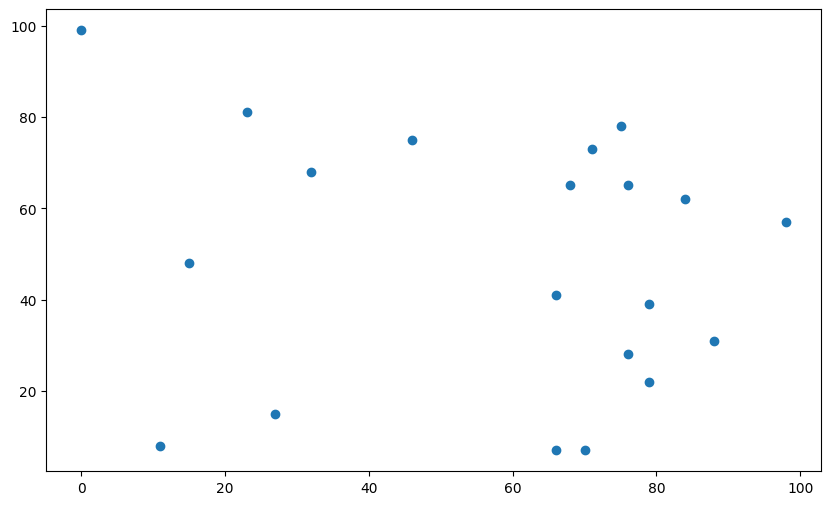

In [4]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot([p[0] for p in random_points], [p[1] for p in random_points], 'o')

## Plot Jarvis March

In [5]:
convex_hull = jarvis_march(random_points)

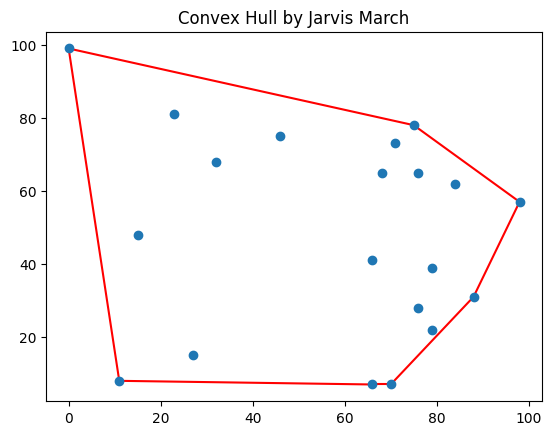

In [6]:
# Plot the convex hull
for i in range(len(convex_hull)):
    plt.plot([convex_hull[i][0], convex_hull[(i+1) % len(convex_hull)][0]],
             [convex_hull[i][1], convex_hull[(i+1) % len(convex_hull)][1]], 'r-')
plt.plot([p[0] for p in random_points], [p[1] for p in random_points], 'o')
plt.title('Convex Hull by Jarvis March')
plt.show()

## Live Demo

In [7]:
def decomposed_jarvis_march(points):
    on_hull = min(points, key=lambda p: p[0])
    hull = []
    frames = []

    while True:
        hull.append(on_hull)
        next_point = points[0]
        for point in points:
            if point is on_hull:
                continue
            val = orientation(on_hull, next_point, point)
            if next_point is on_hull or val == 1:
                next_point = point
            # Call the plotting function 
            frame = plot_progress(points, hull + [next_point], current_point=on_hull, next_point=point)
            frames.append(frame)
        
        on_hull = next_point
        if np.array_equal(next_point, hull[0]):
            break

    # Plot the final hull
    final_frame = plot_progress(points, hull, current_point=None, next_point=None, final=True)
    frames.append(final_frame)  
    return frames

def plot_progress(points, hull, current_point, next_point, final=False):
    plt.figure()
    xs, ys = zip(*points)
    plt.scatter(xs, ys)

    if hull:
        hx, hy = zip(*hull)
        plt.plot(hx, hy, 'r')

    plt.xlim(min(xs) - 1, max(xs) + 1)
    plt.ylim(min(ys) - 1, max(ys) + 1)

    if not final:
        plt.title('Progress of Convex Hull Construction with Jarvis March')
        plt.scatter([current_point[0], next_point[0]], [current_point[1], next_point[1]], color='yellow')
        plt.plot([current_point[0], next_point[0]], [current_point[1], next_point[1]], '--y')
    else:
        plt.title('Final Convex Hull with Jarvis March')
        plt.plot([hull[-1][0], hull[0][0]], [hull[-1][1], hull[0][1]], linestyle='-', color='red')

    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    img = imageio.imread(buf)

    # Small pause
    plt.pause(0.01)
        
    # Clear the output to make the animation effect
    clear_output(wait=True)
    if final:
        plt.show()
    else:
        plt.close()

    return img

def save_gif(frames, filename='jarvis_march_procedure.gif', fps=10):
    imageio.mimsave(filename, frames, fps=fps)

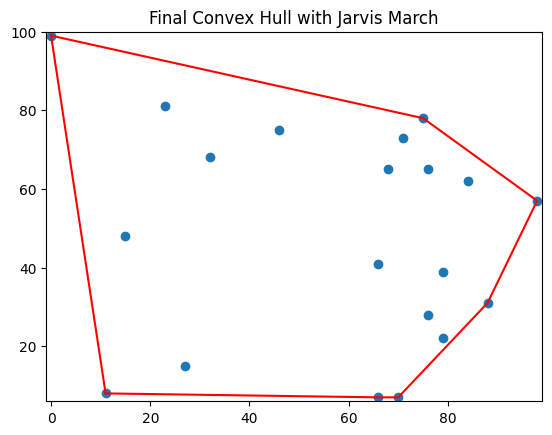

In [8]:
# Example set of points
frames = decomposed_jarvis_march(random_points)

#### Save the gif

In [ ]:
save_gif(frames)